<a href="https://colab.research.google.com/github/Pragna235/Wine_Quality_Prediction/blob/main/Wine_Quality_Prediction_GroundWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

# Importing Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from warnings import filterwarnings
filterwarnings(action='ignore')

# Loading Dataset

In [4]:
wine = pd.read_csv("/content/winequality-red.csv")
wine.sample(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
504,10.5,0.240,0.42,1.8,0.077,6.0,22.0,0.99760,3.21,1.05,10.8,7
891,7.2,0.660,0.03,2.3,0.078,16.0,86.0,0.99743,3.53,0.57,9.7,5
897,7.1,0.590,0.01,2.3,0.080,27.0,43.0,0.99550,3.42,0.58,10.7,6
1333,9.1,0.775,0.22,2.2,0.079,12.0,48.0,0.99760,3.18,0.51,9.6,5
117,7.8,0.560,0.12,2.0,0.082,7.0,28.0,0.99700,3.37,0.50,9.4,6
107,6.2,0.630,0.31,1.7,0.088,15.0,64.0,0.99690,3.46,0.79,9.3,5
1205,7.2,0.360,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,7
1005,6.8,0.360,0.32,1.8,0.067,4.0,8.0,0.99280,3.36,0.55,12.8,7
677,8.6,0.800,0.11,2.3,0.084,12.0,31.0,0.99790,3.40,0.48,9.9,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Description

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Finding Null Values

In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


# Data Analysis

## Countplot:

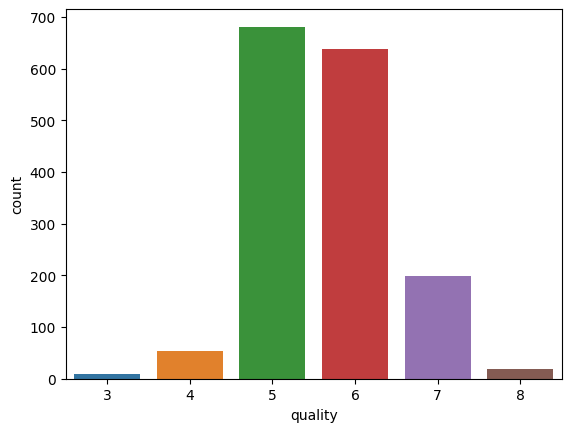

In [32]:
sns.countplot(x='quality',data=wine)
plt.show()

fixed acidity              Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

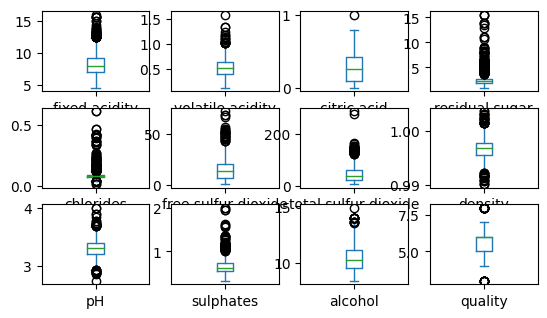

In [10]:
wine.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

<Axes: >

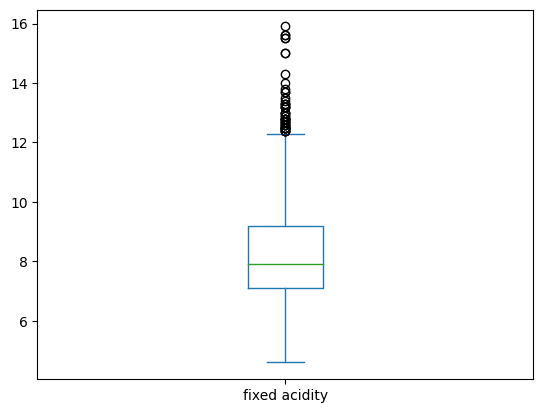

In [11]:
wine['fixed acidity'].plot(kind ='box')

## Histogram

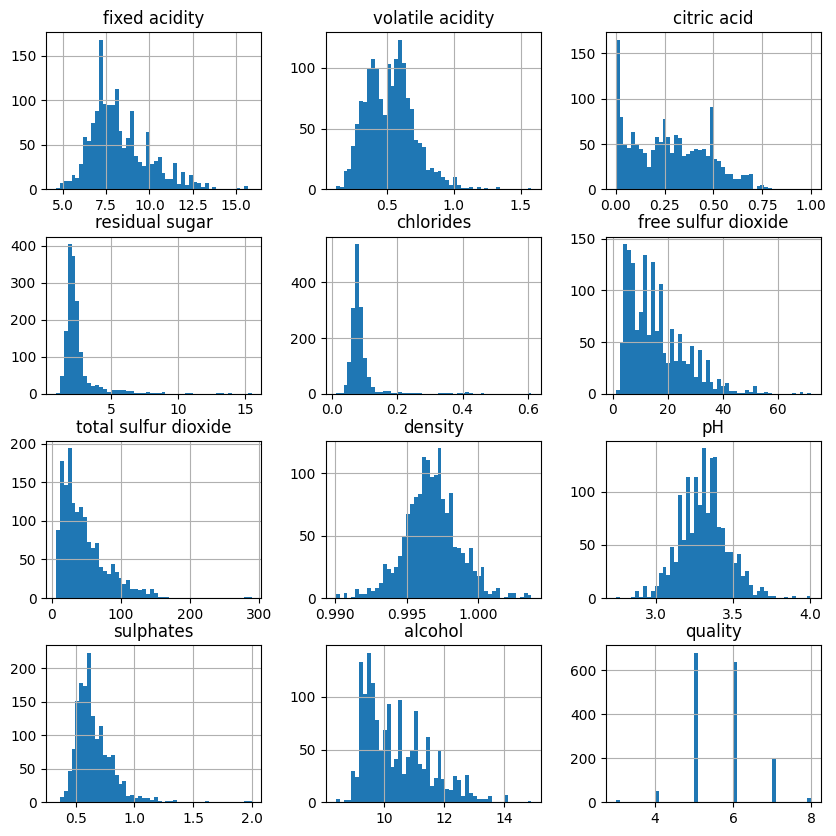

In [12]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

# Feature Selection

In [13]:
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
634,7.9,0.35,0.21,1.9,0.073,46.0,102.0,0.99640,3.27,0.58,9.5,5
1504,7.5,0.38,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,6
1576,8.0,0.30,0.63,1.6,0.081,16.0,29.0,0.99588,3.30,0.78,10.8,6
1486,6.8,0.68,0.21,2.1,0.070,9.0,23.0,0.99546,3.38,0.60,10.3,5
966,9.0,0.38,0.41,2.4,0.103,6.0,10.0,0.99604,3.13,0.58,11.9,7


In [14]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [15]:
# If wine quality is 7 or above then will consider as good quality wine
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
1218,8.2,0.40,0.31,1.9,0.082,8.0,24.0,0.9960,3.24,0.69,10.6,6,0
95,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,6,0
356,11.5,0.41,0.52,3.0,0.080,29.0,55.0,1.0001,3.26,0.88,11.0,5,0
333,8.4,0.56,0.08,2.1,0.105,16.0,44.0,0.9958,3.13,0.52,11.0,5,0
685,8.1,0.78,0.23,2.6,0.059,5.0,15.0,0.9970,3.37,0.56,11.3,5,0


In [16]:
# See total number of good vs bad wines samples
wine['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [17]:
# Separate depedent and indepedent variables
X = wine.drop(['quality','goodquality'], axis = 1)
Y = wine['goodquality']

In [18]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [19]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64


# Feature Importance

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.07703605 0.09845679 0.09370711 0.07664889 0.07104495 0.06659118
 0.08075895 0.0833894  0.0667933  0.11370993 0.17186344]


# Splitting Dataset

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

# Result

In [22]:
model_res=pd.DataFrame(columns=['Model', 'Score'])

# LogisticRegression:

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
# accuracy_score(Y_test,Y_pred)
model_res.loc[len(model_res)] = ['LogisticRegression', accuracy_score(Y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.86875


# Using KNN:

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
model_res.loc[len(model_res)] = ['KNeighborsClassifier', accuracy_score(Y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.868750
1,KNeighborsClassifier,0.872917


##### Using SVC:

In [25]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['SVC', accuracy_score(Y_test,y_pred)]
model_res

Accuracy Score: 0.86875


,Model,Score
0,LogisticRegression,0.868750
1,KNeighborsClassifier,0.872917
2,SVC,0.868750


# Using Decision Tree:

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['DecisionTreeClassifier', accuracy_score(Y_test,y_pred)]
model_res

Accuracy Score: 0.8645833333333334


,Model,Score
0,LogisticRegression,0.868750
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583


# Using GaussianNB:

In [27]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['GaussianNB', accuracy_score(Y_test,y_pred)]
model_res

Accuracy Score: 0.8333333333333334


,Model,Score
0,LogisticRegression,0.868750
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583
4,GaussianNB,0.833333


# Using Random Forest:

In [28]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['RandomForestClassifier', accuracy_score(Y_test,y_pred)]
model_res

Accuracy Score: 0.89375


,Model,Score
0,LogisticRegression,0.868750
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583
4,GaussianNB,0.833333
5,RandomForestClassifier,0.893750


In [29]:
# !pip install xgboost

# Using Xgboost:

In [30]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['XGBClassifier', accuracy_score(Y_test,y_pred)]
model_res

Accuracy Score: 0.8916666666666667


,Model,Score
0,LogisticRegression,0.868750
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583
4,GaussianNB,0.833333
5,RandomForestClassifier,0.893750
6,XGBClassifier,0.891667


In [31]:
model_res = model_res.sort_values(by='Score', ascending=False)
model_res

,Model,Score
5,RandomForestClassifier,0.893750
6,XGBClassifier,0.891667
1,KNeighborsClassifier,0.872917
0,LogisticRegression,0.868750
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583
4,GaussianNB,0.833333
